 # Лабораторная работа 2. Обучение без учителя

Результат лабораторной работы − отчет. Мы предпочитаем принимать отчеты в формате ноутбуков IPython (ipynb-файл). Постарайтесь сделать ваш отчет интересным рассказом, последовательно отвечающим на вопросы из заданий. Помимо ответов на вопросы, в отчете также должен быть код, однако чем меньше кода, тем лучше всем: нам − меньше проверять, вам — проще найти ошибку или дополнить эксперимент. При проверке оценивается четкость ответов на вопросы, аккуратность отчета и кода.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 15 баллов. Сдавать задание после указанного срока сдачи нельзя. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов и понижают карму (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий в открытом источнике, необходимо прислать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, нам необходима ссылка на источник).

### Правила сдачи
Выполненную работу следует отправить в систему Anytask. Более подробно о системе можно почитать на странице курса. Название отправляемого файла должно иметь следующий формат: Surname_Name_Group_NN.ipynb, где NN — номер лабораторной работы. Например, Kozlova_Anna_CS_02.ipynb.

## Кластеризация

![Digits](https://i.imgur.com/DINSGXS.png)

Задача [кластеризации](https://en.wikipedia.org/wiki/Cluster_analysis) данных является одним из примеров задач обучения "без учителя". Она заключается в разбиении множества объектов на кластеры, при этом предполагается, что внутри одного кластера будут находиться похожие между собой объекты. Одним из примеров методов кластеризации является алгоритм [KMeans](https://en.wikipedia.org/wiki/K-means_clustering).

### Выбор числа кластеров

Для некоторых алгоритмов кластеризации число кластеров является гиперпараметром (например, в случае KMeans). Поэтому для выбора количества кластеров может быть использован следующий подход: при фиксированной метрике качества для разного числа кластеров вычисляется кластеризация и выбирается то количество кластеров, начиная с которого качество "стабилизируется".

### Метрики качества

Оценивание качества построенной кластеризации не всегда тривиальная задача, так как следует учитывать такие факты как:
 - объекты одного кластера должны быть более похожи, чем объекты других кластеров, относительно некоторой заданной метрики похожести
 - метрика не должна учитывать абсолютные значения меток объектов, попавших в кластер (в случае, если истинные метки известны)

При выполнении задания для оценки качества получившейся кластеризации воспользуемся следующими метриками:
 - [Homogeneity и Completeness](http://scikit-learn.org/stable/modules/clustering.html#homogeneity-completeness-and-v-measure) 
 - [Adjusted Rand index](http://scikit-learn.org/stable/modules/clustering.html#adjusted-rand-index) 
 - [Silhouette Coefficient](http://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient)

Загрузите набор данных [digits](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html). Перед применением алгоритмов не забудьте перемешать изображения.

In [257]:
from sklearn.datasets import load_digits
import numpy as np
data = load_digits(return_X_y=True)
digits = data[0]
labels = data[1].copy()
perm = np.random.permutation(labels.shape[0])

In [258]:
X = digits[perm]
y_true = labels[perm]

**Задание 1. (1 балл)** Кластеризуйте изображения при помощи алгоритма [KMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html): 
* Подберите число кластеров для некоторой фиксированной метрики из указанных выше. 
* Рассмотрите различные способы выбора начального приближения (параметр *init*). 
* Оцените качество получившейся кластеризации используя все описанные выше метрики. 
* Визуализируйте изображения, соответствующие центроидам лучшей кластеризации. 
* Визуализируйте несколько изображений, которые во всех случаях были отнесены к неправильному кластеру (объект назовем ошибочно отнесенным, если он имеет иную метку класса, нежели большая часть объектов в кластере). Можете ли вы пояснить почему так произошло?

In [259]:
from sklearn.cluster import KMeans
from sklearn import metrics

In [260]:
def count_quality(max_clusters = 30, init_param='k-means++'):
    n_clusters = np.arange(2, max_clusters + 1, 1)
    homo_metr = []
    compl_metr = []
    adj_rand_metr = []
    silho_metr = []
    for i in range(n_clusters.shape[0]):
        clust = KMeans(n_clusters[i], init_param, n_jobs = -1)
        clust.fit(X)
        y_pred = clust.labels_
        homo_metr.append(metrics.homogeneity_score(y_true, y_pred))
        compl_metr.append(metrics.completeness_score(y_true, y_pred))
        adj_rand_metr.append(metrics.adjusted_rand_score(y_true, y_pred))
        silho_metr.append(metrics.silhouette_score(X, y_pred))
    return homo_metr, compl_metr, adj_rand_metr, silho_metr

In [261]:
import matplotlib.pylab as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.5/dist-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [262]:
n_clusters = np.arange(2, 31, 1)
h, c, a, s = count_quality()

**Графики зависимости значений метрик качества от числа кластеров для различных методов выбора начального приближения.**

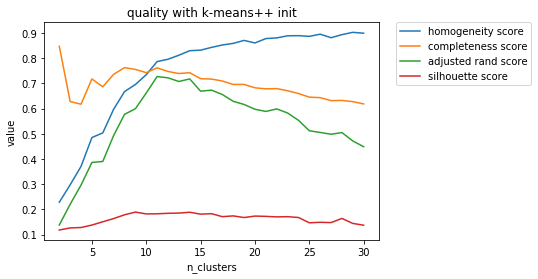

In [263]:
plt.plot(n_clusters, h, label = 'homogeneity score')
plt.plot(n_clusters, c, label = 'completeness score')
plt.plot(n_clusters, a, label = 'adjusted rand score')
plt.plot(n_clusters, s, label = 'silhouette score')
plt.title('quality with k-means++ init')
plt.xlabel('n_clusters')
plt.ylabel('value')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [264]:
n_clusters = np.arange(2, 31, 1)
h, c, a, s = count_quality(init_param='random')

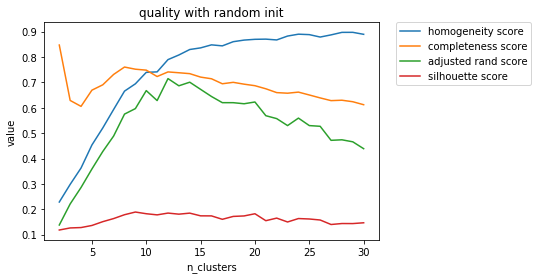

In [265]:
plt.plot(n_clusters, h, label = 'homogeneity score')
plt.plot(n_clusters, c, label = 'completeness score')
plt.plot(n_clusters, a, label = 'adjusted rand score')
plt.plot(n_clusters, s, label = 'silhouette score')
plt.title('quality with random init')
plt.xlabel('n_clusters')
plt.ylabel('value')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

**Визуализация центроидов лучших кластеризаций для различных методов выбора начального приближения.**

In [266]:
rand_clust = KMeans(11, init='random', n_jobs=-1).fit(X)
km_clust = KMeans(12, init='random', n_jobs=-1).fit(X)
rand_centers = rand_clust.cluster_centers_
km_centers = km_clust.cluster_centers_

In [267]:
from skimage.io import imshow, imshow_collection

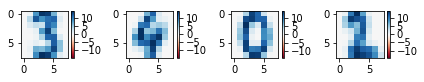

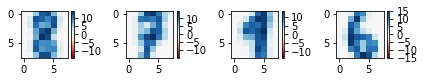

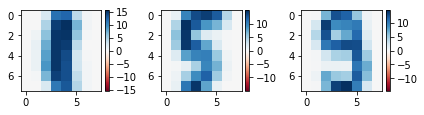

In [268]:
imshow_collection([rand_centers[i].reshape((8,8)) for i in range(4)])
imshow_collection([rand_centers[i].reshape((8,8)) for i in range(4, 8)])
imshow_collection([rand_centers[i].reshape((8,8)) for i in range(8, rand_centers.shape[0])])

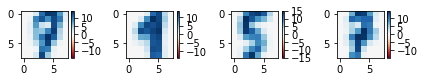

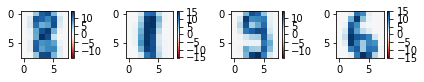

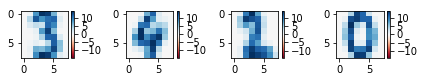

In [269]:
imshow_collection([km_centers[i].reshape((8,8)) for i in range(4)])
imshow_collection([km_centers[i].reshape((8,8)) for i in range(4, 8)])
imshow_collection([km_centers[i].reshape((8,8)) for i in range(8, km_centers.shape[0])])

Не всегда бывает удобно работать с полной матрицей объект-признак, например, для случая визуализации данных. В одной из предыдущих лабораторных работ был рассмотрен метод уменьшения размерности *PCA*. Вот [здесь](http://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html#example-manifold-plot-lle-digits-py) было показано сравнение различных способов сжатия размерности для проекции на плоскость. На изображениях видно, что некоторые преобразования дают неплохую картину и похожие объекты расположены близко друг к другу. Посмотрим, поможет ли это на практике.
 
**Задание 2. (2.5 балла)** Примените преобразования [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) и [tSNE](http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) (для числа компонент 2), после чего подайте полученные представления объектов на вход алгоритмам KMeans, [DBSCAN](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html) и [Birch](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.Birch.html). 
* Сравните новые и предыдущие результаты. 
* Нашлась ли пара "представление"—"алгоритм", превосходящая другие по всем метрикам? 
* Являются ли все три метрики согласованными? Можете ли вы объяснить почему?

In [270]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [271]:
X_pca = PCA(n_components=2).fit_transform(X)
X_tsne = TSNE().fit_transform(X)
print(X_pca.shape)
print(X_tsne.shape)

(1797, 2)
(1797, 2)


In [272]:
from sklearn.cluster import DBSCAN, Birch

In [314]:
km_cl = KMeans(11, init='random', n_jobs=-1)
birch_cl = Birch(n_clusters=11)
db_cl = DBSCAN(eps = 7.5, min_samples=1, n_jobs=-1)

In [320]:
scores = []

X_s = [X, X_pca, X_tsne]
for x in X_s:
    y_s = []
    y_s.append(km_cl.fit(x).labels_)
    y_s.append(birch_cl.fit(x).labels_)
    #y_s.append(db_cl.fit(x).labels_)
    for y_pred in y_s:
        temp_metr = []
        temp_metr.append(metrics.homogeneity_score(y_true, y_pred))
        temp_metr.append(metrics.completeness_score(y_true, y_pred))
        temp_metr.append(metrics.adjusted_rand_score(y_true, y_pred))
        temp_metr.append(metrics.silhouette_score(x, y_pred))
        scores.append(temp_metr)

In [321]:
names = ['No decomposition:', 'PCA decomposition:', 'TSNE decomposition:']
for i in range(len(names)):
    print(names[i])
    for j in range(2*i, 2*i + 2):
        print(scores[j])

No decomposition:
[0.78195447910102944, 0.75739197517078805, 0.72186842867707146, 0.18246243929106104]
[0.85784793098246359, 0.85292615730500199, 0.76310262638220783, 0.1763733798769678]
PCA decomposition:
[0.52261433701185622, 0.50614457612430352, 0.35631464237761712, 0.39064035393837393]
[0.49853839997362753, 0.49346484940856156, 0.32720491865549223, 0.33734562695700337]
TSNE decomposition:
[0.90629667290619076, 0.88011272208293856, 0.86288056177830941, 0.63844568]
[0.91254801016562526, 0.88741214218262754, 0.871339791438561, 0.63534701]


**Уменьшение размерности при помощи PCA не дало хороших результатов, но метод TNSE дал такие данные, что значение метрик резко возросло. Пары данные-алгоритм, которая дала лучший результат относительно остальных, нет (и KMeans, и Birch похожие результаты показали на TNSE). Метрики трудно назвать согласованными, т.к. в зависимости от числа кластеров можно проследить разный характер зависимости метрик качества. К тому же легко можно привести примеры разбиений на кластеры, которые дадут максимальное значение одной метрики, но плохое значение другой (например, много кластеров дадут большое значение homogeneity, но значение completeness будет меньшим, чем если кластеров было бы меньше).**

**Задание 3. (0.5 балла)** Ответьте на следующие вопросы:
* В чём преимущества и недостаки каждого из рассмотренных алгоритмов кластеризации? Ответ обоснуйте.
* Приведите примеры данных, для которых использование каждого из алгоритмов будет наиболее обосновано с точки зрения качества и/или производительности? В этом задании будет достаточно описать какими должны быть данные, приводить примеры конкретных датасетов не нужно.

**Я считаю, что алгоритм DBSCAN() из sklearn не имеет преимуществ, т.к. его очень сложно настроить, чтобы тот не помечал все объекты одной меткой, а даже если и получилось настроить, работать будет он сравнительно долго. .___.**

**Алгоритм KMeans логично применять, когда в данных нет шумов и когда объекты разных классов не слишком перемешаны, при этом один кластер по форме будут шарами размерности числа признаков. 
Про DBSCAN я бы вообще не вспоминал, разве что если захочется боли, но вообще он должен неплохо работать на зашумлённых данных, где есть вкрепления других классов среди объектов одного класса. А Birch более гибок по отношению к KMeans и для не слишком перемешанных объектов разных классов будет давать неплохой результат, даже если формы кластеров не шарообразны.**

## Частичное обучение

![](https://i.imgur.com/C6HjiXq.png)

Качество unsupervised методов можно существенно улучшить, зная правильные ответы хотя бы для небольшой части выборки. Методы такого рода называются _частичным обучением (semi-supervised learning)_. Более подробно про реализацию таких методов в sklearn можно прочитать в разделе [semi-supervised](http://scikit-learn.org/stable/modules/label_propagation.html#semi-supervised).

Загрузите датасет [Wine](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html) и создайте из него выборку, где для каждого класса имеется по одному объекту с известным ответом, а ответы на остальных объектах равны -1. 

In [141]:
from sklearn.datasets import load_wine
wine, labels = load_wine(return_X_y=True)
perm = np.random.permutation(labels.shape[0])
X_train = wine[perm]
y_true = labels[perm]
zero_mask = np.where(y_true == 0)
one_mask = np.where(y_true == 1)
two_mask = np.where(y_true == 2)
y_train = np.ones(labels.shape[0]) * -1
y_train[zero_mask[0][0]] = 0
y_train[one_mask[0][0]] = 1
y_train[two_mask[0][0]] = 2

**Задание 4. (1 балл)** Обучите [LabelSpreading](http://scikit-learn.org/stable/modules/generated/sklearn.semi_supervised.LabelSpreading.html) на этих данных, рассмотрев различные значения параметра **kernel** (*knn*, *rbf*). Посчитайте качество полученной разметки для каждого класса (в качестве метрик используйте точность и полноту). 

In [101]:
from sklearn.semi_supervised import LabelSpreading
from sklearn.metrics import precision_score, recall_score

In [159]:
kernels = ['knn', 'rbf']
y_s = []
for kernel in kernels:
    pred = LabelSpreading(kernel, gamma = 0.1, 
                          n_neighbors=y_train.shape[0] // 3,
                          n_jobs=-1).fit(X_train, y_train).transduction_
    y_s.append(pred)
    print('Kernel = ' + kernel + ' scores: first - precision, second - recall')
    print(precision_score(y_true, pred, average=None))
    print(recall_score(y_true, pred, average=None))

Kernel = knn scores: first - precision, second - recall
[ 0.88135593  0.78947368  0.53225806]
[ 0.88135593  0.63380282  0.6875    ]
Kernel = rbf scores: first - precision, second - recall
[ 0.84615385  0.86956522  0.53731343]
[ 0.93220339  0.56338028  0.75      ]


/usr/local/lib/python3.5/dist-packages/sklearn/semi_supervised/label_propagation.py:293: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions_ /= normalizer


**Задание 5. (0.5 балла)** Отобразите объекты вместе с верными и предсказанными ответами на двумерном графике, использовав [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) с 2 компонентами. 

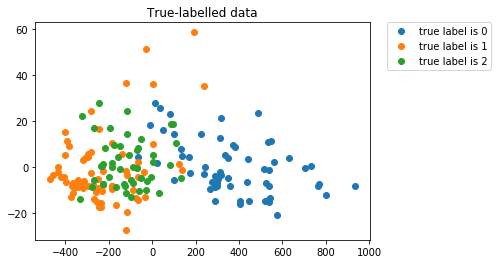

In [160]:
wine_pca = PCA(n_components=2).fit_transform(X_train)
plt.plot(*zip(*wine_pca[y_true==0]), 'o', label='true label is 0')
plt.plot(*zip(*wine_pca[y_true==1]), 'o', label='true label is 1')
plt.plot(*zip(*wine_pca[y_true==2]), 'o', label='true label is 2')
plt.title('True-labelled data')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

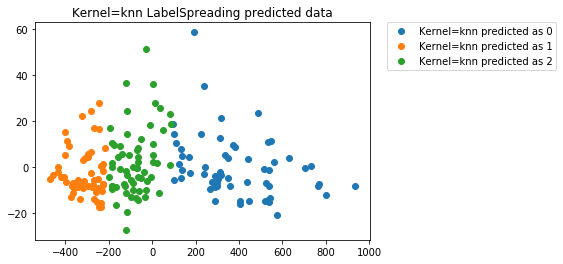

In [161]:
wine_pca = PCA(n_components=2).fit_transform(X_train)
plt.plot(*zip(*wine_pca[y_s[0]==0]), 'o', label='Kernel=knn predicted as 0')
plt.plot(*zip(*wine_pca[y_s[0]==1]), 'o', label='Kernel=knn predicted as 1')
plt.plot(*zip(*wine_pca[y_s[0]==2]), 'o', label='Kernel=knn predicted as 2')
plt.title('Kernel=knn LabelSpreading predicted data')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

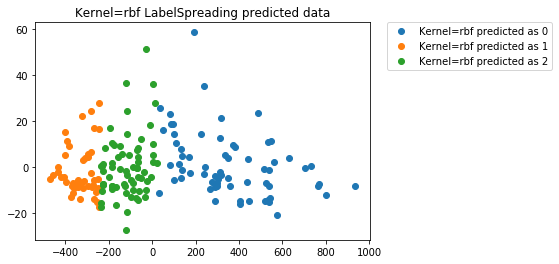

In [162]:
wine_pca = PCA(n_components=2).fit_transform(X_train)
plt.plot(*zip(*wine_pca[y_s[1]==0]), 'o', label='Kernel=rbf predicted as 0')
plt.plot(*zip(*wine_pca[y_s[1]==1]), 'o', label='Kernel=rbf predicted as 1')
plt.plot(*zip(*wine_pca[y_s[1]==2]), 'o', label='Kernel=rbf predicted as 2')
plt.title('Kernel=rbf LabelSpreading predicted data')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


**Задание 6. (0.5 балла)** Попробуйте запустить алгоритм несколько раз, отмечая известными различные объекты, посчитайте качество и визуализируйте результаты. Можно ли сказать что алгоритм сильно зависит от известных начальных объектов? Есть ли класс, для которого это больше всего заметно?

In [169]:
def experiment(kernel='knn'):
    for i in range(3):
        perm = np.random.permutation(labels.shape[0])
        X_train = wine[perm]
        y_true = labels[perm]
        zero_mask = np.where(y_true == 0)
        one_mask = np.where(y_true == 1)
        two_mask = np.where(y_true == 2)
        y_train = np.ones(labels.shape[0]) * -1
        y_train[zero_mask[0][0]] = 0
        y_train[one_mask[0][0]] = 1
        y_train[two_mask[0][0]] = 2
        pred = LabelSpreading(kernel, gamma = 0.1, 
                          n_neighbors=y_train.shape[0] // 3,
                          n_jobs=-1).fit(X_train, y_train).transduction_
        print('Kernel = ' + kernel + ' scores: first - precision, second - recall')
        print(precision_score(y_true, pred, average=None))
        print(recall_score(y_true, pred, average=None))
        wine_pca = PCA(n_components=2).fit_transform(X_train)
        plt.plot(*zip(*wine_pca[pred == 0]), 'o', label='Kernel=' + kernel + ' predicted as 0')
        plt.plot(*zip(*wine_pca[pred == 1]), 'o', label='Kernel=' + kernel +  ' predicted as 1')
        plt.plot(*zip(*wine_pca[pred == 2]), 'o', label='Kernel=' + kernel +  ' predicted as 2')
        plt.title('Kernel=rbf LabelSpreading predicted data')
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        plt.show()

Kernel = knn scores: first - precision, second - recall
[ 0.95833333  0.78947368  0.49315068]
[ 0.77966102  0.63380282  0.75      ]


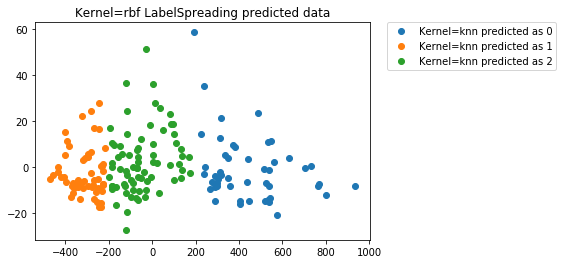

Kernel = knn scores: first - precision, second - recall
[ 0.84615385  0.9047619   0.53521127]
[ 0.93220339  0.53521127  0.79166667]


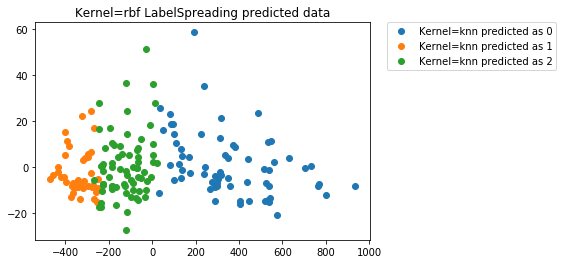

Kernel = knn scores: first - precision, second - recall
[ 0.94230769  0.78947368  0.52173913]
[ 0.83050847  0.63380282  0.75      ]


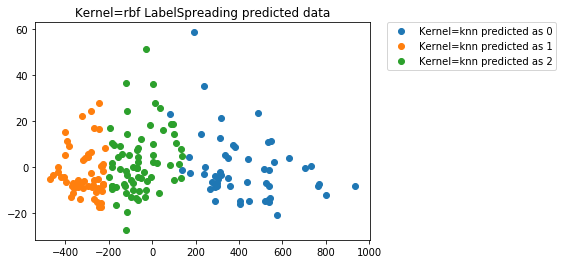

In [170]:
experiment()

/usr/local/lib/python3.5/dist-packages/sklearn/semi_supervised/label_propagation.py:293: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions_ /= normalizer


Kernel = rbf scores: first - precision, second - recall
[ 0.81355932  0.68918919  0.46666667]
[ 0.81355932  0.71830986  0.4375    ]


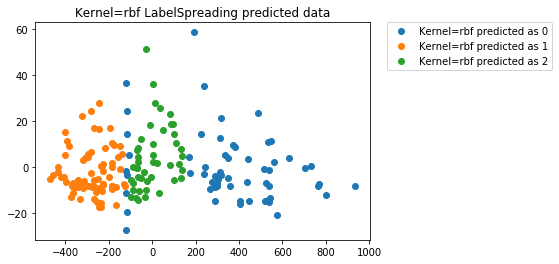

Kernel = rbf scores: first - precision, second - recall
[ 0.74647887  0.69491525  0.52083333]
[ 0.89830508  0.57746479  0.52083333]


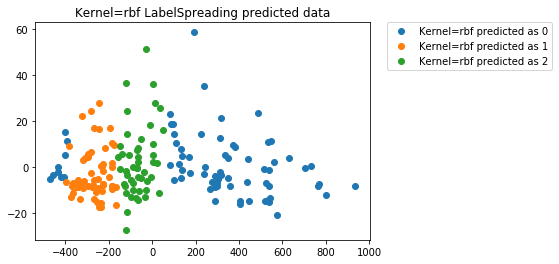

Kernel = rbf scores: first - precision, second - recall
[ 0.28703704  0.16        0.51111111]
[ 0.52542373  0.05633803  0.47916667]


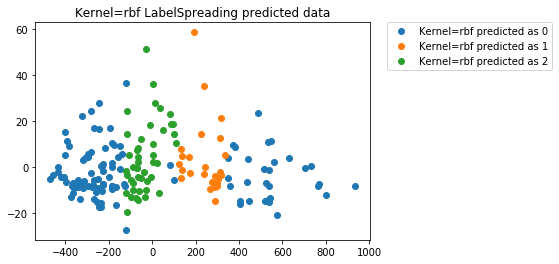

In [171]:
experiment(kernel='rbf')

**Если алгоритму дать объект с такой начальной правильной меткой, что его соседи в большинстве не из этого класса, то алгоритм даст очень, плохой результат, что можно увидеть на последней графике поэтому да, зависит. Также можно увидеть, что классы 1 и 2 перемешаны между собой на визуализации, поэтому, возможно, при повторе случайного выбора помеченных объектов метки классов послк отработки алгоритмов будут расставлены наоборот. Поэтому считаю, что зависит. Я бы сказал, что наиболее это заметно для класса 1.**

## Тематическое моделирование

![](http://imgur.com/S8WgwBp.png)

Тематическое моделирование является популярным инструментом анализа текстов. Задача заключается в поиске тем $T$, которые хорошо бы описывали документы $D$ со словарём $W$. Большинство тематических моделей оперирует данными в формате "мешка слов", т.е. учитывают только частоты слов в документах, а не их порядок. Одной из простейших тематических моделей является [PLSA](https://en.wikipedia.org/wiki/Probabilistic_latent_semantic_analysis), которая приводит к задаче стохастического матричного разложения: 

$$F \approx \Phi \times \Theta$$
где
- $F_{W \times D}$— матрица распределений слов в документах (нормированные частоты)
- $\Phi_{W \times T}$ — матрица распределений слов в темах (модель)
- $\Theta_{T \times D}$ — матрица распределений тем в документах (результат применения модели к обучающим данным)

Можно сказать, что алгоритмы тематического моделирования производят мягкую бикластеризацию данных:
 - *мягкую*, так как объекты относятся не строго к одному кластеру, а к нескольким с разными вероятностями
 - *бикластеризацию*, так как модель одновременно кластеризует слова по темам и темы по документам.

### EM-алгоритм

![](http://imgur.com/EeIuI1T.png)

С вероятностной точки зрения, задача обучения модели PLSA ставится как максимизация неполного правдоподобия по параметам $\Phi$ и $\Theta$. ЕМ-алгоритм для модели PLSA заключается в повторении двух шагов:

- **Е-шаг** — оценка распределений тем для каждого слова в каждом документе по параметрам $\Phi$ и $\Theta$ (шаг 6);
- **М-шаг** — обновление параметров $\Phi$ и $\Theta$ на основе полученных оценок (шаги 7 и 9).

Существуют различные модификации итерационного процесса, позволяющие снизить расходы по памяти. В данном случае, мы избежим хранения трехмерной матрицы $p_{tdw}$, сразу пересчитывая $\Theta$ для текущего документа и аккумулируя счетчики $n_{wt}$ для последующего пересчета $\Phi$.

Псевдокод алгоритма записывается следующим образом:

1. Инициализировать $\phi_{wt}^0$ для всех $w \in W$, $t \in T$ и $\theta_{td}^0$ для всех $t \in T$, $d \in D$
2. Внешний цикл по итерациям $i = 1 ... max\_iter$:
3. $\quad$ $n_{wt}^i := 0$, $n_t^i := 0$ для всех $w \in W$ и $t \in T$ 
4. $\quad$ Внутренний цикл по документам $d \in D$  
5. $\qquad$ $Z_w := \sum_{t \in T} \phi_{wt}^{i-1}\theta_{td}^{i-1}$ для всех $w \in d$ $\cfrac{}{}$
6. $\qquad$ $p_{tdw} := \cfrac{ \phi_{wt}^{i-1}\theta_{td}^{i-1} }{ Z_w }$ (**E-шаг**)
7. $\qquad$ $\theta_{td}^{i} := \cfrac{ \sum_{w \in d} n_{dw} p_{tdw} }{ n_d }$ для всех $t \in T$ (**M-шаг**)
8. $\qquad$ Увеличить $n_{wt}^i$ и $n_t^i$ на $n_{dw} p_{tdw}$ для всех $w \in W$ и $t \in T$
9. $\quad \phi_{wt}^i := \cfrac{n_{wt}^i}{n_t^i}$ для всех $w \in W$ и $t \in T$ (**M-шаг**)

Обозначения:
 - $p_{tdw}$ — вероятность темы $t$ для слова $w$ в документе $d$
 - $\phi_{wt}$ — элемент матрицы $\Phi$, соответствующий вероятности слова $w$ в теме $t$
 - $\theta_{td}$ — элемент матрицы $\Theta$, соответствующий вероятности темы $t$ в документе $d$
 - $n_{wt}$ — элемент матрицы счётчиков отнесения слова $w$ к теме $t$ (путем нормирования этой матрицы получается матрица $\Phi$)
 - $Z_w$ — элемент вектора вспомогательных переменных, соответствующий слову $w$
 - $n_t$ — вектор нормировочных констант для матрицы $n_{wt}$
 - $n_d$ — вектор нормировочных констант для матрицы $n_{dw}$
 - $n$ — суммарное число слов в коллекции
 
###  Оценка качества

Для оценивания качества построенной модели и контроля сходимости процесса обучения обычно используют [перплексию](http://www.machinelearning.ru/wiki/images/8/88/Voron-iip9-talk.pdf):

$$\mathcal{P} = \exp\bigg(- \frac{\mathcal{L}}{n} \bigg) = \exp\bigg(- \cfrac{1}{n}\sum_{d \in D}\sum_{w \in d} n_{dw} \ln \big(\sum_{t \in T}\phi_{wt}\theta_{td} \big)\bigg)$$

Это традиционная мера качества в тематическом моделировании, которая основана на правдоподобии модели $\mathcal{L}$. Число итераций $max\_iter$ в алгоритме обучения следует выбирать достаточным для того, чтобы перплексия перестала существенно убывать. Однако известно, что перплексия плохо отражает интерпретируемость найденных тем, поэтому помимо нее обычно используются дополнительные меры или экспертные оценки.

### Рекомендации к реализации
- При делении на нулевые значения нужно просто заменить частное на ноль.
- ЕМ-алгоритм стоит реализовывать с использованием векторных операций. Для проверки корректности реализации сперва можно написать скалярную версию, после чего векторизовать её, удостоверившись, что обе реализации дают одинаковый результат. Невекторизованный алгоритм может работать в сотни раз медленнее векторизованного, и его использование может привести к невозможности выполнения задания.
- Итерационный процесс следует начинать, инициализировав матрицы $\Phi$ и $\Theta$. Инициализация может быть случайной, важно не забыть отнормировать столбцы матриц.
- Неэффективная реализация перплексии может в разы замедлить работу алгоритма.

Загрузите [коллекцию писем Х. Клинтон](https://www.dropbox.com/s/je8vq5fsb8xpy2u/hillary_data.zip?dl=0). 

In [172]:
import pandas as pd

In [239]:
data = pd.read_csv('output/Emails.csv')

'UNCLASSIFIED\nU.S. Department of State\nCase No. F-2015-04841\nDoc No. C05739677\nDate: 05/13/2015\nSTATE DEPT. - PRODUCED TO HOUSE SELECT BENGHAZI COMM.\nSUBJECT TO AGREEMENT ON SENSITIVE INFORMATION & REDACTIONS. NO FOIA WAIVER.\nRELEASE IN PART\nB5\nFrom: Sullivan, Jacob J <SullivanJJ@state.gov>\nSent: Friday, October 12, 2012 12:57 AM\nTo:\nCc: Schwerin, Daniel B\nSubject Ending of speech\nB5\nUNCLASSIFIED\nU.S. Department of State\nCase No. F-2015-04841\nDoc No. C05739677\nDate: 05/13/2015\nSTATE DEPT. - PRODUCED TO HOUSE SELECT BENGHAZI COMM.\nSUBJECT TO AGREEMENT ON SENSITIVE INFORMATION & REDACTIONS. NO FOIA WAIVER. STATE-5CB0045651\n\x0c'

Извлеките полные тексты писем из файла *Emails.csv* и подготовьте данные в формате "мешка слов" с помощью функции  [CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) пакета sklearn. Рекомендуется произвести фильтрацию слов по частотности для удаления слишком редких и стоп-слов (рекомендованный нижний порог в пределах 10 и верхний 400-600).

In [178]:
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict

In [241]:
features = CountVectorizer().fit(data['RawText'])

In [193]:
keys = list(features.vocabulary_.keys())
val = np.array(list(features.vocabulary_.values()))
correct_features = defaultdict(int)
pred = np.where(np.logical_and(val >= 10, val <= 500))
for i in pred[0]:
    correct_features[keys[i]] = val[i]

**Задание 7. (4 балла)** Реализуйте описанный выше ЕМ-алгоритм для модели $PLSA$ и добавьте в вашу реализацию подсчёт перплексии. Примените ваш алгоритм к подготовленным данным, рассмотрев число тем T = 5. 
* Постройте график значения перплексии в зависимости от итерации (убедитесь в корректности реализации: график перплексии должен быть невозрастающим). 
* Выведите для каждой темы топ-20 наиболее вероятных слов. 

In [ ]:
def EM_algorithm(bow, docs, T=5, max_iter=100):
    n_d = np.array([np.sum(docs[i].values())] for i in range(len_docs))
    phi = np.exp(np.random.uniform(0., 1., (len(bow), T)))
    sums_phi = np.sum(phi, axis=0)
    phi = np.divide(phi, sums_phi)
    theta = np.exp(np.random.uniform(0.,1., (T, len(docs))))
    sums_theta = np.sum(theta, axis=0)
    theta = np.divide(theta, sums_theta)
    for i in range(max_iter):
        n_wt = np.zeros((len(bow), T))
        n_t = np.zeros((T,))
        for j in range(len(docs)):
            z_w = phi.dot(theta[:, j])
            p_temp = np.multiply(phi, theta[:, j])
            p_tdw = np.divide(p_temp, z_w)
            theta[:, j] = np.sum(np.multiply(p_tdw, np.array(docs[i].values())), axis=0) / n_d[j]
            n_wt = 

**Задание 8. (2 балла)** Рассмотрите большее число тем (10, 20) и несколько различных начальных приближений. Проанализируйте результаты и ответьте на следующие вопросы: 
- Mожно ли сказать, что конкретность каждой темы изменяется с ростом их числа?
- Устойчив ли алгоритм к начальному приближению на примере идентичности топовых слов в соответствующих темах?
- Отражает ли перплексия качество получаемых моделей? В чём заключается причина хорошего/плохого соответствия?

### Модель LDA и визуализация

Модель [LDA](https://en.wikipedia.org/wiki/Latent_Dirichlet_allocation) является наиболее популярной тематической моделью. Единственное отличие от модели PLSA заключается в введении априорных распределений Дирихле на столбцы матриц $\Phi$ и $\Theta$, которое может способствовать дополнительному сглаживанию или разреживанию параметров.

В этом задании предлагается воспользоваться реализацией модели [LdaModel](https://radimrehurek.com/gensim/models/ldamodel.html), обучение которой основано на вариационном байесовском выводе.

Выполнение задания потребует установки пакетов [gensim](https://radimrehurek.com/gensim/install.html) и [pyldavis 2.0](https://pyldavis.readthedocs.io/en/latest/readme.html#installation).


Для обучения *LdaModel* и её последующей визуализации потребуется словарь формата gensim, который можно получить следующей командой

    dictionary = gensim.corpora.Dictionary.from_corpus(corpora, vocab_dict)

где *corpora* содержит полученное с помощью gensim представление коллекции, а *vocab_dict* — это dict, полученный после работы CountVectorizer, ставящий в соответствие каждому номеру строки в матрице данных само слово в виде строки.

Подготовьте данные в формате, подходящем для *gensim* (полное [API](https://radimrehurek.com/gensim/apiref.html) gensim). [Пример обработки вывода](https://gist.github.com/aronwc/8248457) *CountVectorizer* для gensim.

**Задание 9. (1.5 балла)** Примените [LdaModel](https://radimrehurek.com/gensim/models/ldamodel.html) к подготовленным данным (рекомендуется задать заведомо большое число итераций в параметре *passes*, например, 30). Визуально сравните полученные темы по топ-20 наиболее вероятным словам с темами, полученными вашей реализацией ЕМ-алгоритма (нерегуляризованного). Какая из моделей даёт более интерпретируемые темы и почему?

**Задание 10. (1.5 балл)** Визуализируйте модель из gensim с помощью библиотеки *ldavis* ([API](http://pyldavis.readthedocs.io/en/latest/modules/API.html) LDAvis для работы с gensim), [пример использования](https://github.com/bmabey/pyLDAvis/blob/master/notebooks/pyLDAvis_overview.ipynb).